In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv("Data/Churn_Modelling.csv")

In [109]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3123,3124,15622171,Nnamdi,642,France,Male,30,8,80964.57,2,1,0,174738.20,0
7286,7287,15751167,Toscano,680,France,Female,43,4,0.00,2,1,1,58761.33,0
9514,9515,15565879,Riley,845,France,Female,28,9,0.00,2,1,1,56185.98,0
6872,6873,15642816,De Salis,850,France,Female,27,7,43658.33,2,1,1,3025.49,0
3150,3151,15795298,Olisaemeka,573,Germany,Female,35,9,206868.78,2,0,1,102986.15,0


In [110]:
df.shape

(10000, 14)

In [111]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [112]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), str(3)
memory usage: 1.1 MB


In [113]:
df.duplicated().sum()

np.int64(0)

In [114]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [115]:
df.drop(columns=["RowNumber","CustomerId", "Surname"],inplace=True)

In [116]:
new_df = pd.get_dummies(df,columns=["Gender","Geography"], drop_first=True)

In [117]:
new_df = new_df.astype(int)

In [118]:
new_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CreditScore        10000 non-null  int64
 1   Age                10000 non-null  int64
 2   Tenure             10000 non-null  int64
 3   Balance            10000 non-null  int64
 4   NumOfProducts      10000 non-null  int64
 5   HasCrCard          10000 non-null  int64
 6   IsActiveMember     10000 non-null  int64
 7   EstimatedSalary    10000 non-null  int64
 8   Exited             10000 non-null  int64
 9   Gender_Male        10000 non-null  int64
 10  Geography_Germany  10000 non-null  int64
 11  Geography_Spain    10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB


In [119]:
new_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,1,0,0
9996,516,35,10,57369,1,1,1,101699,0,1,0,0
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,1,0


In [120]:
from sklearn.model_selection import train_test_split

x = new_df.drop(columns=["Exited"])
y = new_df["Exited"]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [122]:
x_scaled_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  0.91324755,
         1.72572313, -0.57638802],
       [-0.29729735,  0.3900109 , -1.38944225, ...,  0.91324755,
        -0.57946723, -0.57638802],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -1.09499335,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -1.09499335,
        -0.57946723, -0.57638802],
       [ 0.41876609, -0.94100321, -0.3483691 , ...,  0.91324755,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.00972116, -1.38944225, ...,  0.91324755,
         1.72572313, -0.57638802]], shape=(2000, 11))

In [123]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [124]:
x_train.shape

(8000, 11)

In [125]:
model = Sequential()

model.add(Dense(3,activation="sigmoid",input_dim = 11))
model.add(Dense(1,activation="sigmoid"))

c:\Users\nyc-Twice\Code\mlibs\mlibs\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [127]:
model.compile(loss="binary_crossentropy", optimizer="Adam",metrics=["accuracy"])

In [128]:
history = model.fit(x_scaled_train, y_train, epochs=20,validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7480 - loss: 0.5894 - val_accuracy: 0.7944 - val_loss: 0.5393
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.5205 - val_accuracy: 0.7987 - val_loss: 0.4916
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.4892 - val_accuracy: 0.7987 - val_loss: 0.4672
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.4713 - val_accuracy: 0.7994 - val_loss: 0.4519
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7936 - loss: 0.4592 - val_accuracy: 0.7994 - val_loss: 0.4413
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7942 - loss: 0.4507 - val_accuracy: 0.8000 - val_loss: 0.4338
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7958 - loss: 0.4444 - val_accuracy: 0.8087 - val_loss: 0.4282
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8000 - loss: 0.4398 - val_accuracy: 0.

In [129]:
model.layers[1].get_weights()

[array([[-1.8397818],
        [ 1.1903324],
        [-1.5872906]], dtype=float32),
 array([-0.19375175], dtype=float32)]

In [130]:
predictions = [1 if x > 0.5 else 0 for x in model.predict(x_scaled_test) ]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [131]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)

0.827

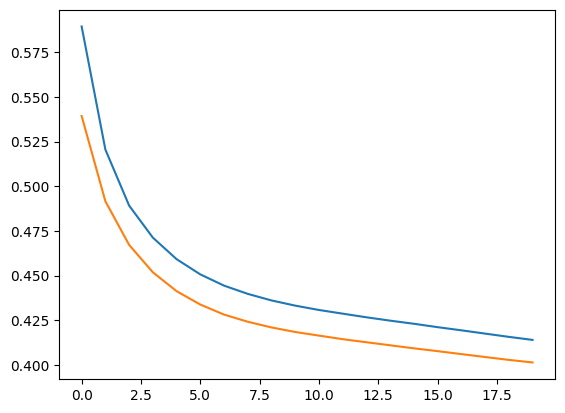

In [132]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

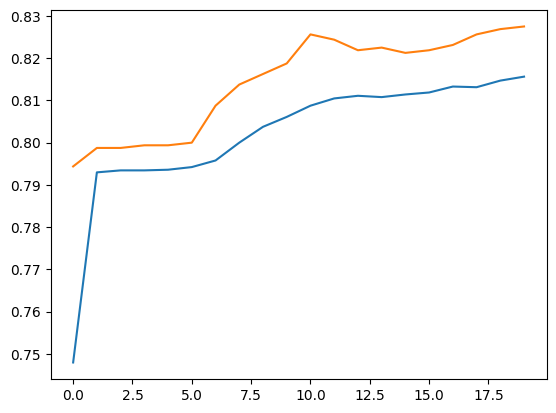

In [133]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])